# Matplotlib Basics

**Figure** are called axes - can hold one or multiple plots, like a container

In [3]:
# convert to datime format
import pandas as pd

stock_prices = pd.read_csv("../data/stock_prices.csv")

# filter Amazon stocks
amazon_stocks = stock_prices[stock_prices["ticker"]=="AMZN"]

amazon_stocks.head()

,Unnamed: 0,date,ticker,open,high,low,close,adjusted_close,volume,sector
19081,19081,2014-01-02,AMZN,19.9400,19.9680,19.7010,19.8985,19.8985,42756000,Retail
19082,19082,2014-01-03,AMZN,19.9145,20.1355,19.8110,19.8220,19.8220,44204000,Retail
19083,19083,2014-01-06,AMZN,19.7925,19.8500,19.4210,19.6815,19.6815,63412000,Retail
19084,19084,2014-01-07,AMZN,19.7520,19.9235,19.7145,19.9015,19.9015,38320000,Retail
19085,19085,2014-01-08,AMZN,19.9235,20.1500,19.8020,20.0960,20.0960,46330000,Retail


In [3]:
# set date as datimetime and index
amazon_stocks["datetime"] = pd.to_datetime(amazon_stocks["date"])

amazon_stocks.set_index("datetime", inplace=True)

/var/folders/4l/xr8p7w157497lf8n30n3k31w0000gn/T/ipykernel_21510/3896442664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_stocks["datetime"] = pd.to_datetime(amazon_stocks["date"])


In [4]:
amazon_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2726 entries, 2014-01-02 to 2024-10-30
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2726 non-null   int64  
 1   date            2726 non-null   object 
 2   ticker          2726 non-null   object 
 3   open            2726 non-null   float64
 4   high            2726 non-null   float64
 5   low             2726 non-null   float64
 6   close           2726 non-null   float64
 7   adjusted_close  2726 non-null   float64
 8   volume          2726 non-null   int64  
 9   sector          2726 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 234.3+ KB


In [7]:
amazon_stocks.drop(["Unnamed: 0", "date"], axis=1, inplace=True)

amazon_stocks.head()

/var/folders/4l/xr8p7w157497lf8n30n3k31w0000gn/T/ipykernel_21510/3553292810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_stocks.drop(["Unnamed: 0", "date"], axis=1, inplace=True)


,ticker,open,high,low,close,adjusted_close,volume,sector
datetime,,,,,,,,
2014-01-02,AMZN,19.9400,19.9680,19.7010,19.8985,19.8985,42756000,Retail
2014-01-03,AMZN,19.9145,20.1355,19.8110,19.8220,19.8220,44204000,Retail
2014-01-06,AMZN,19.7925,19.8500,19.4210,19.6815,19.6815,63412000,Retail
2014-01-07,AMZN,19.7520,19.9235,19.7145,19.9015,19.9015,38320000,Retail
2014-01-08,AMZN,19.9235,20.1500,19.8020,20.0960,20.0960,46330000,Retail


## Plots with annotations

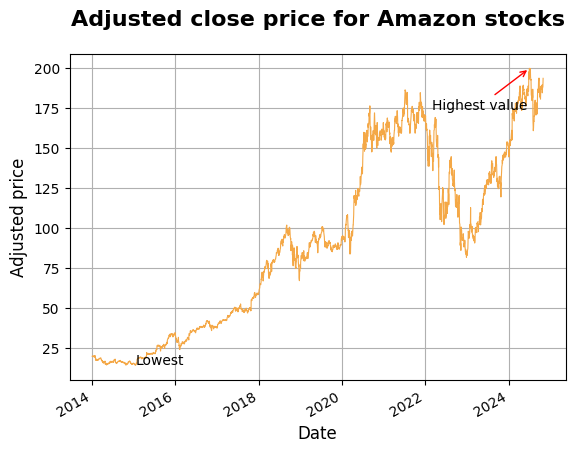

In [22]:
import matplotlib.pyplot as plt

amazon_stocks["adjusted_close"].plot(kind="line", color="#F4A847", linewidth=0.8)

# titles
plt.title("Adjusted close price for Amazon stocks", fontsize="16", fontweight="bold", pad=20)
plt.ylabel("Adjusted price", fontsize="12")
plt.xlabel("Date", fontsize="12")

# annotations
plt.annotate(text="Highest value", 
            xy=("2024-07-02",    200.0000), # get the coordinates from the code below for highest value
            xytext=(-70, -30), #position of the annotation
            textcoords="offset points", # set this parameter for a relative value
            arrowprops = dict(arrowstyle="->", color="red") # ask GPT to create this
            )

plt.annotate(text="Lowest", xy=("2015-01-15",     14.3475))

# add a grid
plt.grid(True, which="both") # for which you can select X, y or both

# save figures
plt.savefig("amazong_plots.png")

In [8]:
# check the peak prices to add to the annotate above
amazon_stocks["adjusted_close"].sort_values()

datetime
2015-01-15     14.3475
2014-10-24     14.3530
2014-05-08     14.4160
2015-01-20     14.4720
2014-10-27     14.4985
                ...   
2024-07-08    199.2900
2024-07-09    199.3400
2024-07-10    199.7900
2024-07-05    200.0000
2024-07-02    200.0000
Name: adjusted_close, Length: 2726, dtype: float64

## Manipulating Axis


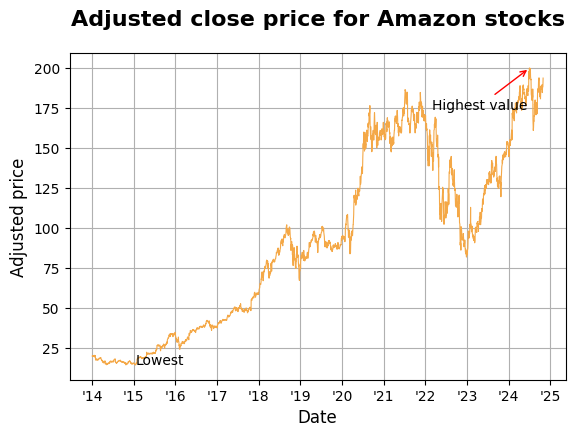

In [28]:
# to manipulate axis easily, create it was below, and then move to the adjusment
import matplotlib.dates as mdates

ax = amazon_stocks["adjusted_close"].plot(kind="line", color="#F4A847", linewidth=0.8)

# adjust axes to show each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y")) # formats how the years are shown, only wuth 2 digits
plt.xticks(rotation=0, ha="center") # remove rotation from x labels and center it, ha= horizontal alignment

# titles
plt.title("Adjusted close price for Amazon stocks", fontsize="16", fontweight="bold", pad=20)
plt.ylabel("Adjusted price", fontsize="12")
plt.xlabel("Date", fontsize="12")

# annotations
plt.annotate(text="Highest value", 
            xy=("2024-07-02",    200.0000), # get the coordinates from the code below for highest value
            xytext=(-70, -30), #position of the annotation
            textcoords="offset points", # set this parameter for a relative value
            arrowprops = dict(arrowstyle="->", color="red") # ask GPT to create this
            )

plt.annotate(text="Lowest", xy=("2015-01-15",     14.3475))

# add a grid
plt.grid(True, which="both") # for which you can select X, y or both

# save figures
plt.savefig("amazong_plots.png")

## Multiple Line Charts - Reshaping

In [36]:
# graph Amazon and Netflix performance together
companies = ["AAPL", "AMZN"]

# filter for multiple values
amazon_and_apple = stock_prices[stock_prices["ticker"].isin(companies)]

amazon_and_apple["ticker"].unique()


array(['AAPL', 'AMZN'], dtype=object)

In [39]:
# select adjusted_close for Apple and Amazon

# EXAMPLE OF DESIRED OUTPUT
# datetime      AAPL    AMZN
# 2019-09-12    45      233

# need to pivot the data - .pivot() exchange between rows, columns and values

amazon_and_apple["datetime"] = pd.to_datetime(amazon_and_apple["date"])

pivoted_adjusted_close = amazon_and_apple.pivot(index="datetime", columns="ticker", values="adjusted_close")

pivoted_adjusted_close.head()

/var/folders/4l/xr8p7w157497lf8n30n3k31w0000gn/T/ipykernel_21510/2302801972.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_and_apple["datetime"] = pd.to_datetime(amazon_and_apple["date"])


ticker,AAPL,AMZN
datetime,,
2014-01-02,17.253258,19.8985
2014-01-03,16.874273,19.8220
2014-01-06,16.966291,19.6815
2014-01-07,16.844955,19.9015
2014-01-08,16.951628,20.0960


<Axes: xlabel='datetime'>

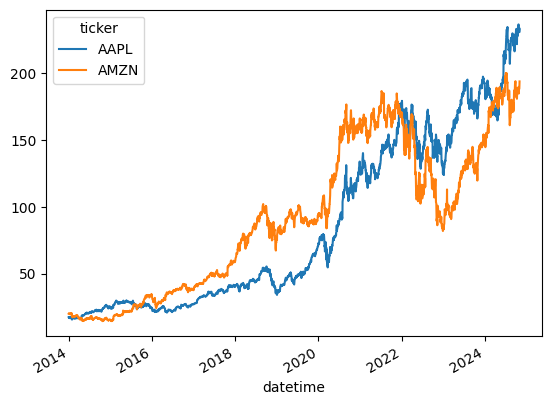

In [40]:
pivoted_adjusted_close.plot()

## Column Charts

They are suitable when you have numeric and categorical data

In [58]:
stock_prices["datetime"] = pd.to_datetime(stock_prices["date"])

stock_prices.drop(["Unnamed: 0", "date"], axis=1, inplace=True)

stock_prices.set_index("datetime", inplace=True)
stock_prices["sector"].unique()

array(['Electronics', 'Biotech and Pharmaceuticals', 'Tech Services',
       'Retail', 'Finance', 'Manufacturing', 'Consumer Services',
       'Energy', 'Consumer Packaged Goods', 'Materials and Processing',
       'Commercial Services', 'Telecommunications', 'Durable Goods',
       'Healthcare Services', 'Logistics and Transportation'],
      dtype=object)

In [59]:
tech_services = stock_prices[stock_prices["sector"]=="Tech Services"]
tech_services["ticker"].unique()

array(['ACN', 'ADBE', 'CRM', 'CSCO', 'GOOG', 'GOOGL', 'META', 'MSFT',
       'NFLX', 'ORCL'], dtype=object)

In [60]:
tech_services.sample(10)

,ticker,open,high,low,close,adjusted_close,volume,sector
datetime,,,,,,,,
2024-02-16,ADBE,589.9000,590.1400,546.3700,546.6600,546.66000,10323000,Tech Services
2024-05-29,ADBE,472.7800,482.7900,472.6000,477.6000,477.60000,2214800,Tech Services
2017-01-30,ACN,115.3200,115.3300,113.4100,114.6300,101.27692,2529700,Tech Services
2024-02-20,ORCL,110.5400,110.7700,107.6800,108.4500,107.55495,10975600,Tech Services
2015-05-13,CSCO,29.1400,29.4700,29.1300,29.3500,21.77298,38264000,Tech Services
2015-12-18,META,106.0800,106.5900,103.9700,104.0400,103.72769,35994200,Tech Services
2015-09-04,NFLX,98.0500,99.9300,97.3400,98.7900,98.79000,24212000,Tech Services
2022-05-13,META,192.5800,199.8900,191.2800,198.6200,198.02376,24549800,Tech Services
2023-12-04,NFLX,460.9900,461.2000,451.2000,453.9000,453.90000,5157700,Tech Services


In [63]:
tech_services_2020_01_30 = tech_services.loc["2020-01-30"]

print(tech_services_2020_01_30)

           ticker     open      high     low     close  adjusted_close  \
datetime                                                                 
2020-01-30    ACN  207.500  208.9300  205.20  208.3700      194.358170   
2020-01-30   ADBE  349.690  356.8200  349.69  356.7400      356.740000   
2020-01-30    CRM  180.900  185.9400  180.54  185.6700      184.849380   
2020-01-30   CSCO   46.540   47.2700   46.26   47.2400       40.721024   
2020-01-30   GOOG   71.998   72.8640   71.82   72.7920       72.613670   
2020-01-30  GOOGL   71.905   72.7625   71.75   72.7125       72.532900   
2020-01-30   META  206.530  211.4300  204.75  209.5300      208.901030   
2020-01-30   MSFT  174.050  174.0500  170.79  172.7800      165.592350   
2020-01-30   NFLX  341.100  348.2000  339.25  347.7400      347.740000   
2020-01-30   ORCL   52.820   53.3300   52.28   53.3100       49.570675   

              volume         sector  
datetime                             
2020-01-30   1579600  Tech Services

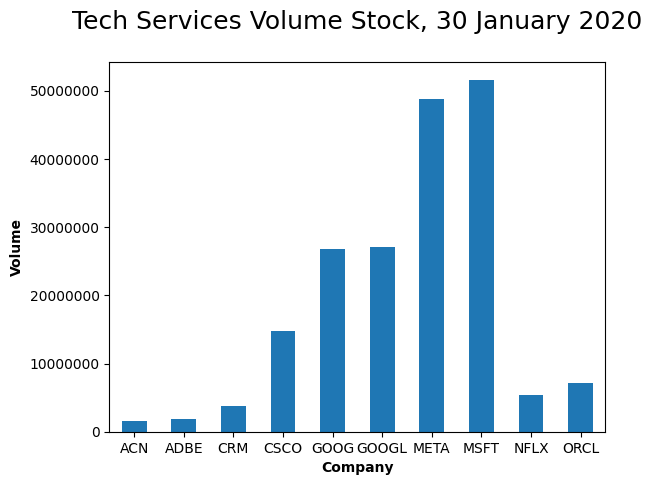

In [73]:
tech_services_2020_01_30.plot(kind="bar", x="ticker", y="volume", legend=False) # remove legend as not needed

plt.title("Tech Services Volume Stock, 30 January 2020", fontsize="18", pad=24)
plt.xlabel("Company", fontsize="10", fontweight="bold")
plt.ylabel("Volume", fontsize="10", fontweight="bold")

plt.xticks(rotation=0, ha="center")

# set the y axis labels to be non-scientific notation
plt.ticklabel_format(style="plain", axis="y")

## Scatterplots

Allows you to explore relationships in your data

In [31]:
# relationshipt between the prices o GOOGL and AMZN
amazon_and_apple = stock_prices[stock_prices["ticker"].isin(["AAPL", "GOOGL"])]

amazon_and_apple.sample(10)

,Unnamed: 0,date,ticker,open,high,low,close,adjusted_close,volume,sector
54661,54661,2014-07-28,GOOGL,29.8875,30.0550,29.6295,29.9510,29.877020,27162000,Tech Services
55090,55090,2016-04-11,GOOGL,38.2725,38.3610,37.8670,37.8770,37.783440,31774000,Tech Services
56000,56000,2019-11-19,GOOGL,66.3315,66.3315,65.5885,65.6295,65.467400,21864000,Tech Services
896,896,2017-07-25,AAPL,37.9500,38.4600,37.9500,38.1850,35.702732,75415600,Electronics
664,664,2016-08-22,AAPL,27.2150,27.2750,26.9625,27.1275,25.022260,103280800,Electronics
55578,55578,2018-03-19,GOOGL,55.8880,55.9685,54.4460,55.0035,54.867640,63656000,Tech Services
56973,56973,2023-10-03,GOOGL,133.9400,134.2600,131.8400,132.4300,132.102890,22989400,Tech Services
54894,54894,2015-06-30,GOOGL,27.2545,27.2950,26.9770,27.0020,26.935305,34510000,Tech Services
1491,1491,2019-12-04,AAPL,65.2675,65.8275,65.1700,65.4350,63.507896,67181600,Electronics
1099,1099,2018-05-15,AAPL,46.6950,46.7675,46.2750,46.6100,44.257496,94780800,Electronics


<Axes: xlabel='volume', ylabel='close'>

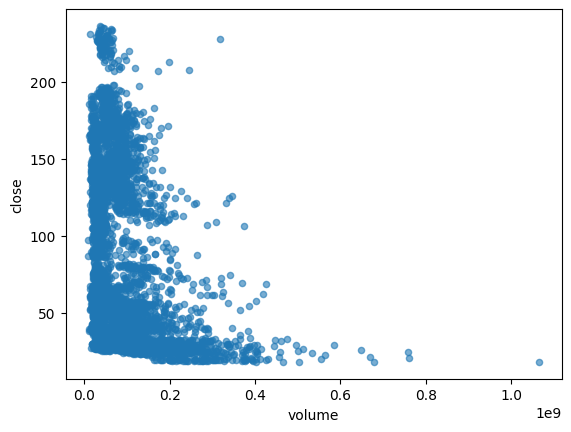

In [37]:
amazon_and_apple.plot(kind="scatter", x="volume", y="close", alpha=0.6)

## Grouped Column Charts

STEPS:

**DATA PREPARATION**:

- filtered_df = df[df["ticker"].isin(["A", "B", "C"])]
- grouped = filtered_df.groupby(["ticker", filtered_by.index.year])
- average_volume = grouped["volume"].mean()

THEN YOU GET A MULTIINDEX, but you need to use UNSTACK METHOD to plot

- average_volume.unstack()
- average_volume.plot(kind="bar")